In [1]:
import xtrack as xt
import xpart as xp
import xplot as xplt
import numpy as np

In [2]:
## Generate a simple line
n = 6
fodo = [
    xt.Multipole(length=0.2, knl=[0, +0.2], ksl=[0, 0]),
    xt.Drift(length=1.0),
    xt.Multipole(length=0.2, knl=[0, -0.2], ksl=[0, 0]),
    xt.Drift(length=1.0),
    xt.Multipole(length=1.0, knl=[2 * np.pi / n], hxl=[2 * np.pi / n]),
    xt.Drift(length=1.0),
]
line = xt.Line(elements=n * fodo)

In [ ]:
## Twiss
tracker = xt.Tracker(line=line)
tw = tracker.twiss(
    method="4d",
    particle_ref=xp.Particles(mass0=xp.PROTON_MASS_EV, q0=1, p0c=1e12),
    at_s=np.linspace(0, line.get_length(), 500),
)

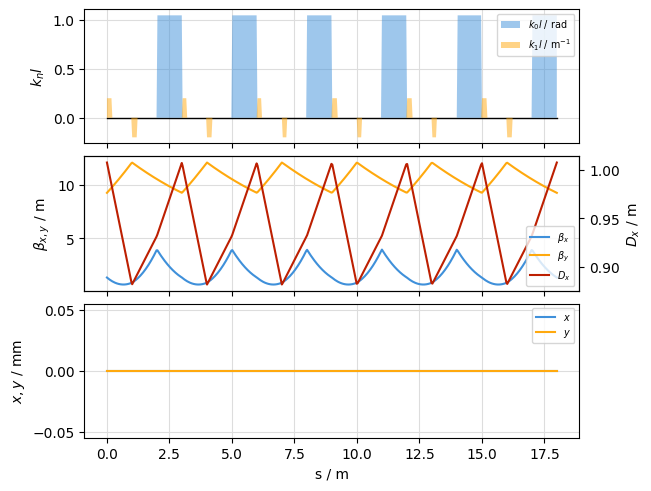

In [4]:
plot = xplt.TwissPlot(tw, line=line)

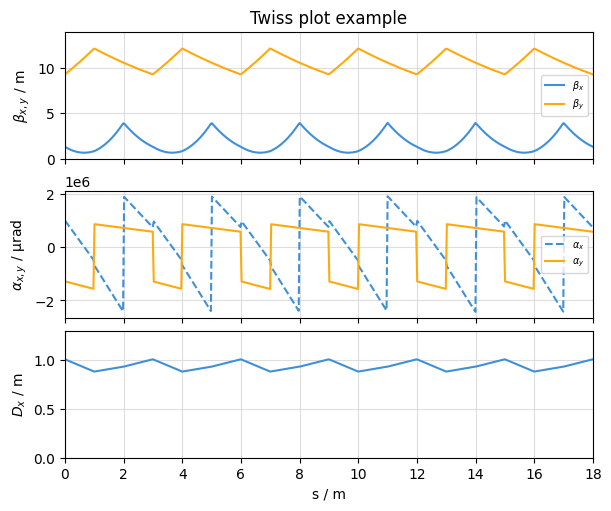

In [5]:
plot = xplt.TwissPlot(tw, kind="bet,alfx+alfy,dx", figsize=(6, 5), display_units=dict(alf="urad"))

# adjust some axes
plot.ax[0].set(title="Twiss plot example", ylim=(0, 14))
plot.ax[2].set(ylim=(0, 1.3), xlim=(0, line.get_length()))
plot.ax[0].legend(loc="right")

# adjust line layout
plot.artists[1][0][0].set_ls("--")
plot.ax[1].legend()